In [1]:
# mount google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
# Import useful libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import math

In [32]:
# Read data from files available
# gender_income_df = pd.read_excel('/content/drive/My Drive/CS506 DataScience/Final Project/Deliverable 1/poverty_line_analysis/Gender_Income_Distribution.xlsx', sheet_name="Data")
gender_income_df = pd.read_excel('./Gender_Income_Distribution.xlsx', sheet_name="Data")

In [33]:
gender_income_df

,Label,Total,Percent,Male,Male Percent,Female,Female Percent
0,Population 16 years and over with earnings,"402,258","402,258","196,249","196,249","206,009","206,009"
1,Median earnings (dollars),"49,039",(X),"52,862",(X),"43,406",(X)
2,"FULL-TIME, YEAR-ROUND WORKERS WITH EARNINGS","242,302","242,302","124,769","124,769","117,533","117,533"
3,"$1 to $9,999 or loss","4,095",1.7%,"1,744",1.4%,"2,351",2.0%
4,"$10,000 to $14,999","4,257",1.8%,"2,032",1.6%,"2,225",1.9%
5,"$15,000 to $24,999","8,611",3.6%,"4,646",3.7%,"3,965",3.4%
6,"$25,000 to $34,999","16,429",6.8%,"7,662",6.1%,"8,767",7.5%
7,"$35,000 to $49,999","34,587",14.3%,"16,982",13.6%,"17,605",15.0%
8,"$50,000 to $64,999","41,497",17.1%,"21,325",17.1%,"20,172",17.2%
9,"$65,000 to $74,999","19,534",8.1%,"8,812",7.1%,"10,722",9.1%


In [34]:
gender_income_df = gender_income_df[3:12]

In [35]:
gender_income_df

,Label,Total,Percent,Male,Male Percent,Female,Female Percent
3,"$1 to $9,999 or loss","4,095",1.7%,"1,744",1.4%,"2,351",2.0%
4,"$10,000 to $14,999","4,257",1.8%,"2,032",1.6%,"2,225",1.9%
5,"$15,000 to $24,999","8,611",3.6%,"4,646",3.7%,"3,965",3.4%
6,"$25,000 to $34,999","16,429",6.8%,"7,662",6.1%,"8,767",7.5%
7,"$35,000 to $49,999","34,587",14.3%,"16,982",13.6%,"17,605",15.0%
8,"$50,000 to $64,999","41,497",17.1%,"21,325",17.1%,"20,172",17.2%
9,"$65,000 to $74,999","19,534",8.1%,"8,812",7.1%,"10,722",9.1%
10,"$75,000 to $99,999","38,288",15.8%,"16,851",13.5%,"21,437",18.2%
11,"$100,000 or more","75,004",31.0%,"44,715",35.8%,"30,289",25.8%


In [36]:
gender_income_df.at[3, 'Label'] = '< $10,000'
gender_income_df.at[11, 'Label'] = '> $100,000'
gender_income_df

,Label,Total,Percent,Male,Male Percent,Female,Female Percent
3,"< $10,000","4,095",1.7%,"1,744",1.4%,"2,351",2.0%
4,"$10,000 to $14,999","4,257",1.8%,"2,032",1.6%,"2,225",1.9%
5,"$15,000 to $24,999","8,611",3.6%,"4,646",3.7%,"3,965",3.4%
6,"$25,000 to $34,999","16,429",6.8%,"7,662",6.1%,"8,767",7.5%
7,"$35,000 to $49,999","34,587",14.3%,"16,982",13.6%,"17,605",15.0%
8,"$50,000 to $64,999","41,497",17.1%,"21,325",17.1%,"20,172",17.2%
9,"$65,000 to $74,999","19,534",8.1%,"8,812",7.1%,"10,722",9.1%
10,"$75,000 to $99,999","38,288",15.8%,"16,851",13.5%,"21,437",18.2%
11,"> $100,000","75,004",31.0%,"44,715",35.8%,"30,289",25.8%


In [37]:
# Cleaning the data 
gender_income_df['Male Percent'] = (gender_income_df['Male Percent']).str.replace('%', '')
gender_income_df['Percent'] = (gender_income_df['Percent']).str.replace('%', '')
gender_income_df['Female Percent'] = (gender_income_df['Female Percent']).str.replace('%', '')
gender_income_df['Male Percent'] = gender_income_df['Male Percent'].astype(float)
gender_income_df['Percent'] = gender_income_df['Percent'].astype(float)
gender_income_df['Female Percent'] = gender_income_df['Female Percent'].astype(float)
gender_income_df

C:\Users\patte\AppData\Local\Temp\ipykernel_20544\1548144923.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gender_income_df['Male Percent'] = (gender_income_df['Male Percent']).str.replace('%', '')
C:\Users\patte\AppData\Local\Temp\ipykernel_20544\1548144923.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gender_income_df['Percent'] = (gender_income_df['Percent']).str.replace('%', '')
C:\Users\patte\AppData\Local\Temp\ipykernel_20544\1548144923.py:4: SettingWithCopyWarning: 
A value is trying to b

,Label,Total,Percent,Male,Male Percent,Female,Female Percent
3,"< $10,000","4,095",1.7,"1,744",1.4,"2,351",2.0
4,"$10,000 to $14,999","4,257",1.8,"2,032",1.6,"2,225",1.9
5,"$15,000 to $24,999","8,611",3.6,"4,646",3.7,"3,965",3.4
6,"$25,000 to $34,999","16,429",6.8,"7,662",6.1,"8,767",7.5
7,"$35,000 to $49,999","34,587",14.3,"16,982",13.6,"17,605",15.0
8,"$50,000 to $64,999","41,497",17.1,"21,325",17.1,"20,172",17.2
9,"$65,000 to $74,999","19,534",8.1,"8,812",7.1,"10,722",9.1
10,"$75,000 to $99,999","38,288",15.8,"16,851",13.5,"21,437",18.2
11,"> $100,000","75,004",31.0,"44,715",35.8,"30,289",25.8


In [38]:
gender_income_df['Label'] = gender_income_df['Label'].str.replace("to", "-")
gender_income_df

C:\Users\patte\AppData\Local\Temp\ipykernel_20544\1856627150.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gender_income_df['Label'] = gender_income_df['Label'].str.replace("to", "-")


,Label,Total,Percent,Male,Male Percent,Female,Female Percent
3,"< $10,000","4,095",1.7,"1,744",1.4,"2,351",2.0
4,"$10,000 - $14,999","4,257",1.8,"2,032",1.6,"2,225",1.9
5,"$15,000 - $24,999","8,611",3.6,"4,646",3.7,"3,965",3.4
6,"$25,000 - $34,999","16,429",6.8,"7,662",6.1,"8,767",7.5
7,"$35,000 - $49,999","34,587",14.3,"16,982",13.6,"17,605",15.0
8,"$50,000 - $64,999","41,497",17.1,"21,325",17.1,"20,172",17.2
9,"$65,000 - $74,999","19,534",8.1,"8,812",7.1,"10,722",9.1
10,"$75,000 - $99,999","38,288",15.8,"16,851",13.5,"21,437",18.2
11,"> $100,000","75,004",31.0,"44,715",35.8,"30,289",25.8


Text(0, 0.5, '% population')

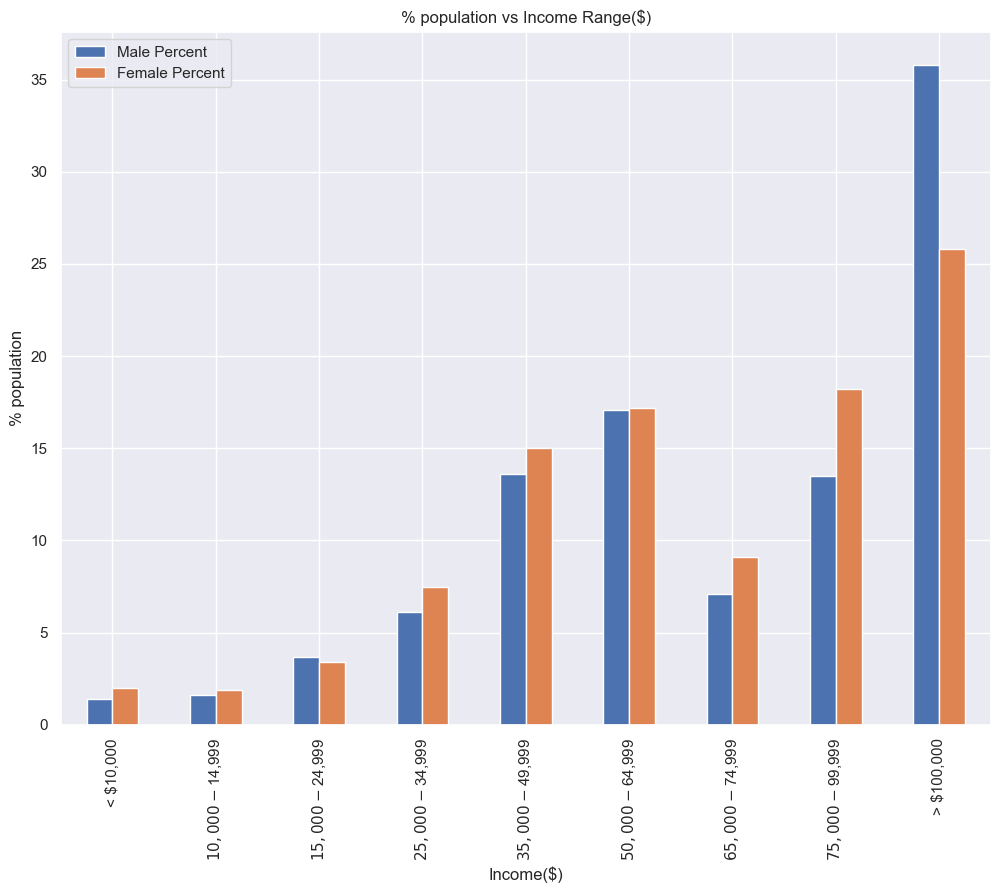

In [43]:
plt = gender_income_df.plot(x="Label", y=["Male Percent", "Female Percent"], kind="bar", figsize=[12, 9])
plt.set_title("% population vs Income Range($)")
plt.set_xlabel("Income($)")
plt.set_ylabel("% population")

In [45]:
# Read Race vs Income Distribution CSV file

gender_income_df = pd.read_excel('./Race_Income_Distribution.xlsx', sheet_name="Data")
gender_income_df

,Income Range,White People,% White People,Black/African,% Black/African,American Indian and Alaska,% American Indian and Alaska,Asian,% Asian,Native Hawaiian,% Hawaiian,Hispanic/Latino,% Hispanic/Latino,Other Race,% Other Races,Two or More Race,% Two or More Races
0,"< $10,000",54402,3.887909,12289,10.017608,147,5.187015,11300,7.537906,36,4.460967,16602,8.980510,7958,9.341143,10735,6.705561
1,"$10,000 to $14,999",39629,2.832138,6631,5.405383,397,14.008469,4442,2.963131,32,3.965304,15889,8.594828,6625,7.776461,9857,6.157123
2,"$15,000 to $19,999",32368,2.313221,3220,2.624843,302,10.656316,2968,1.979868,6,0.743494,8125,4.395052,3615,4.243306,6349,3.965869
3,"$20,000 to $24,999",36240,2.589939,4298,3.503595,121,4.269584,4236,2.825714,0,0.000000,6395,3.459244,2078,2.439168,5598,3.496761
4,"$25,000 to $29,999",29626,2.117260,5972,4.868187,133,4.693013,3008,2.006551,46,5.700124,8719,4.716364,3730,4.378294,6895,4.306925
5,"$30,000 to $34,999",30034,2.146419,4114,3.353604,224,7.904023,1981,1.321468,37,4.584882,5181,2.802555,2044,2.399258,5773,3.606074
6,"$35,000 to $39,999",32627,2.331731,3155,2.571857,85,2.999294,2282,1.522257,94,11.648079,5407,2.924805,3020,3.544892,5525,3.451162
7,"$40,000 to $44,999",38159,2.727082,4053,3.303879,84,2.964008,2129,1.420195,0,0.000000,6437,3.481963,3641,4.273825,3792,2.368653
8,"$45,000 to $49,999",29316,2.095106,2536,2.067268,43,1.517290,2412,1.608976,21,2.602230,7489,4.051020,3158,3.706877,5712,3.567971
9,"$50,000 to $59,999",67398,4.816685,8586,6.999038,192,6.774876,6622,4.417347,68,8.426270,10469,5.662990,6621,7.771765,8482,5.298237


In [47]:
gender_income_df = gender_income_df[0:16]

Text(0.5, 1.0, '% population vs Income for each race')

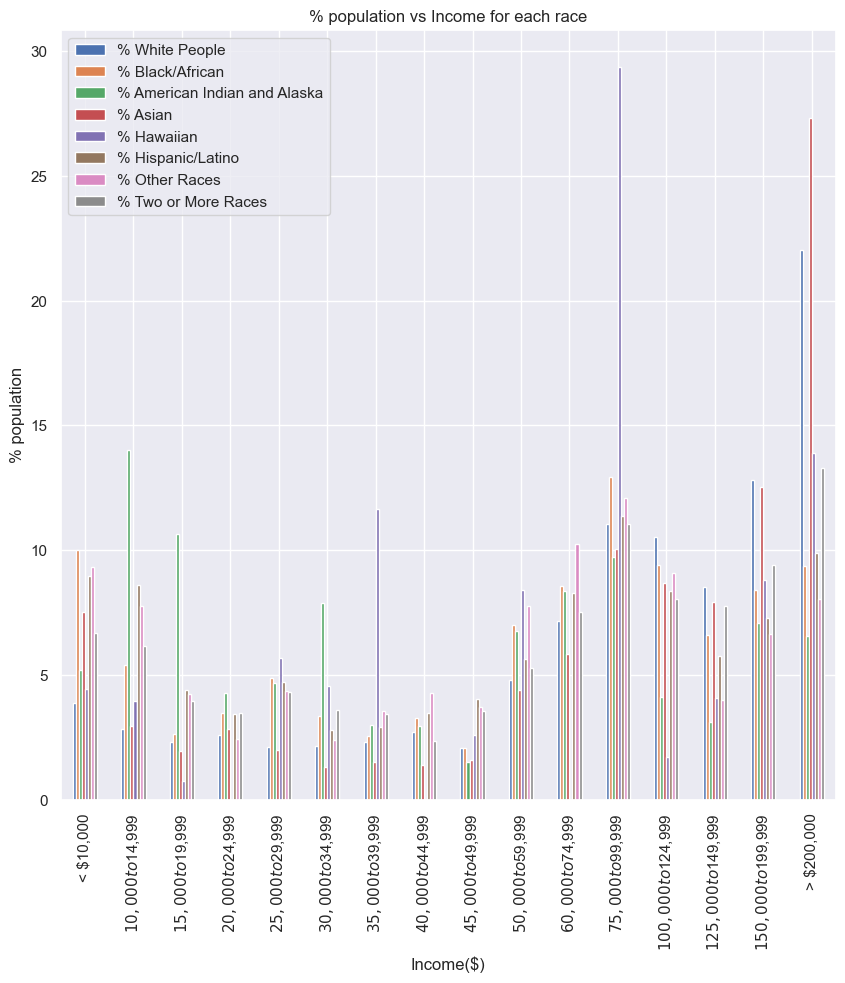

In [50]:
plt = gender_income_df.plot(x="Income Range", y=["% White People", "% Black/African", "% American Indian and Alaska", "% Asian", "% Hawaiian", "% Hispanic/Latino","% Other Races", "% Two or More Races"], kind="bar", figsize=[10,10], xlabel="Income($)", ylabel="% population")
plt.set_title("% population vs Income for each race")

Text(0.5, 1.0, '% population vs Income for each race')

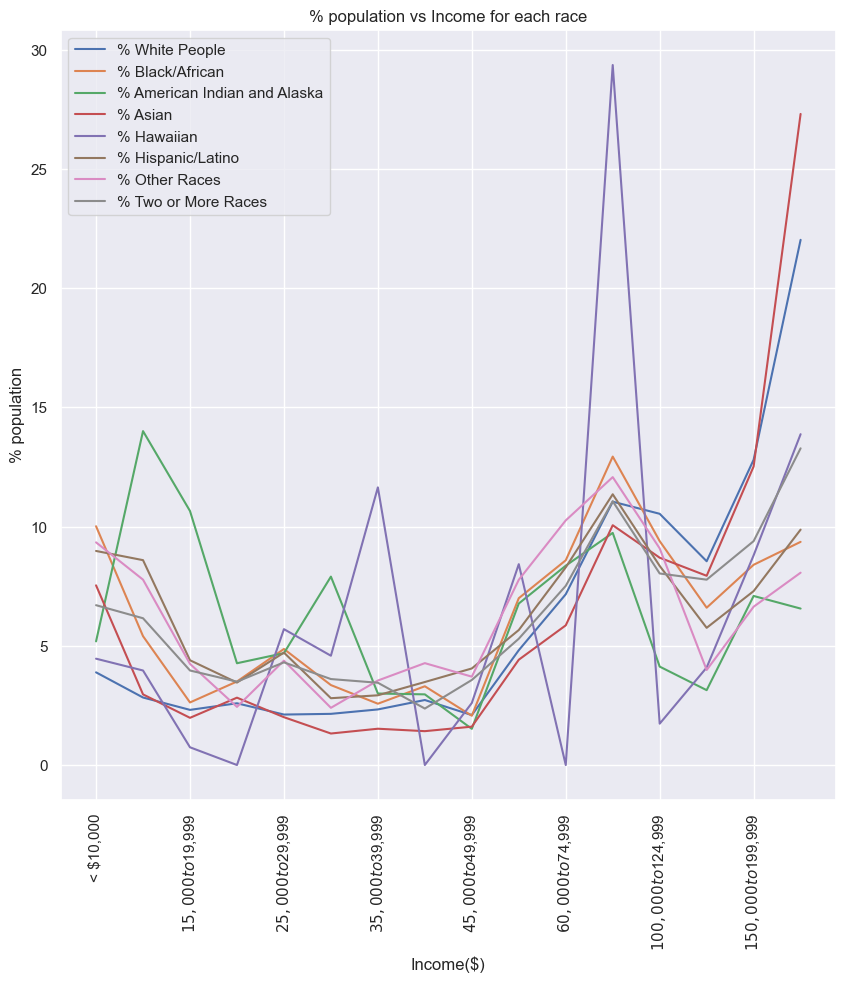

In [56]:
plt = gender_income_df.plot(x="Income Range", y=["% White People", "% Black/African", "% American Indian and Alaska", "% Asian", "% Hawaiian", "% Hispanic/Latino","% Other Races", "% Two or More Races"], kind="line", figsize=[10,10], xlabel="Income($)", ylabel="% population", rot=90)
plt.set_title("% population vs Income for each race")